In [4]:
import tensorflow as tf

In [2]:
#y = m*x + b Linear Equation
m = tf.constant(3.0, name='m')
b =tf.constant(1.5,name='b')
x = tf.placeholder(dtype='float32',name='x')
y = m*x+b
sess = tf.Session()
y.eval({x:2},session=sess)

7.5

In [5]:
#Higher rank add
M = tf.constant([[1,2],[3,4]], dtype='float32')
v = tf.constant([5,6], dtype='float32')
M+v

<tf.Tensor 'add_1:0' shape=(2, 2) dtype=float32>

In [7]:
#Run with a session
sess = tf.Session()
sess.run(M+v)

array([[ 6.,  8.],
       [ 8., 10.]], dtype=float32)

In [8]:
sess.run(M*v)

array([[ 5., 12.],
       [15., 24.]], dtype=float32)

In [10]:
sess
sess.run(tf.matmul(M,tf.reshape(v,[2,1]))) #reshape to match dimentions

array([[17.],
       [39.]], dtype=float32)

In [11]:
# Pseudo ML Lifecycle
import pandas as pd
from pandas import DataFrame as DF
import numpy as np

In [16]:
# Data collection (creation)
np.random.seed(555)

X1 = np.random.normal(100, 15, 200).astype(int)
X2 = np.random.normal(10, 4.5, 200)
X3 = np.random.normal(32, 4, 200).astype(int)

dob = np.datetime64('2017-10-31') - 365*X3
b = 5 #Intercept

err = np.random.normal(0, 15, 200)
Y = np.array([0.3*x1 + 1.5*x2 + 0.83*x3 + b + 3 for x1,x2,x3,e in zip(X1,X2,X3,err)])

In [30]:
#CLEANING
cols = ['iq', 'years_experience','dob']
df = DF(list(zip(X1,X2,dob)), columns=cols)
df['income'] = Y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
iq                  200 non-null int64
years_experience    200 non-null float64
dob                 200 non-null datetime64[ns]
income              200 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 6.3 KB


In [ ]:
mkdir tensorfl

In [31]:
df.describe()

,iq,years_experience,income
count,200.000000,200.000000,200.000000
mean,98.895000,9.708405,78.475708
std,14.991253,4.654536,8.788167
min,62.000000,-5.789565,53.445951
25%,88.500000,6.603565,72.787092
50%,99.000000,10.021919,78.691652
75%,108.250000,12.927809,83.623287
max,134.000000,21.889216,102.105315


In [32]:
df = df[df.years_experience>=0]
df.describe()

,iq,years_experience,income
count,196.000000,196.000000,196.000000
mean,98.959184,9.963718,78.884199
std,14.769628,4.332578,8.355472
min,62.000000,0.084480,57.975309
25%,88.500000,6.940314,73.111657
50%,99.000000,10.192384,78.956858
75%,108.250000,12.967590,83.655408
max,134.000000,21.889216,102.105315


In [33]:
#Eploritory Data Analysis
df.describe( include=['datetime64'])

,dob
count,196
unique,22
top,1986-11-08 00:00:00
freq,20
first,1975-11-11 00:00:00
last,1996-11-05 00:00:00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4156d3e470>,
      dtype=object)

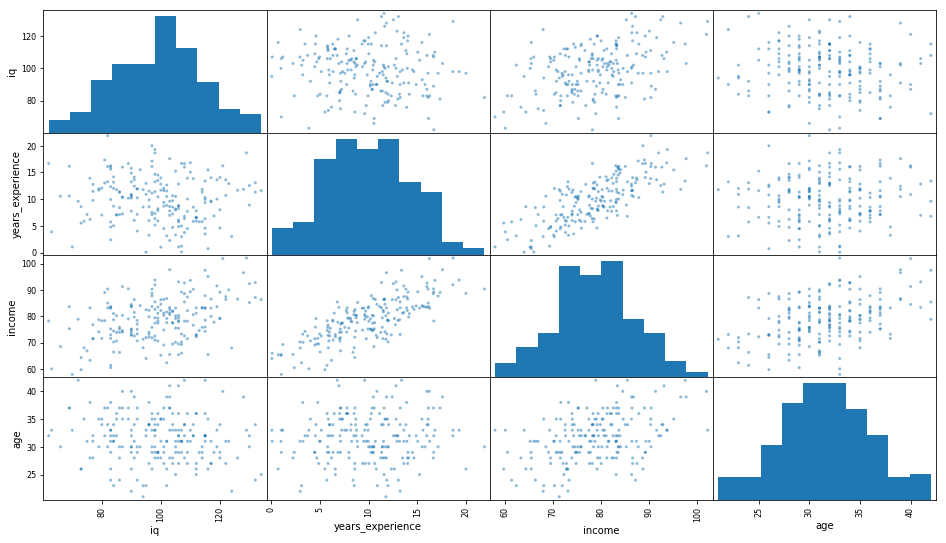

In [37]:
#visualize data
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.scatter_matrix(df, figsize=(16,9))

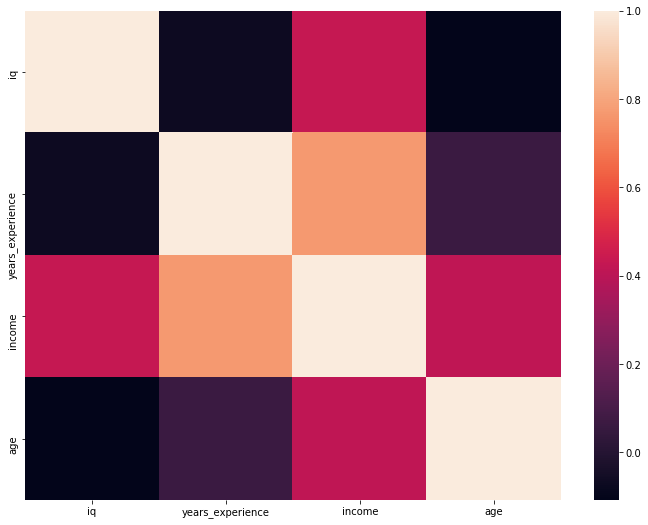

In [38]:
import seaborn as sns
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())

In [36]:
#Feature engineering
from datetime import datetime as dt
df['age'] = df.dob.apply(lambda x: (dt.strptime('2017-10-31','%Y-%m-%d')- x).days/365)
df.drop('dob', axis=1,inplace=True)
df.head()

,iq,years_experience,income,age
0,102,3.134666,62.391999,23.0
1,105,15.245371,83.118057,25.0
2,83,2.391084,60.556625,29.0
3,103,9.606721,80.700081,33.0
4,97,11.134619,83.681929,36.0


In [79]:
#Split dataset 
X = df.iloc[:,[0,1,3]] # all rows, select columns 0,1,3
Y = df.income
tr_idx = X.sample(frac=0.67).index #take 67% of x indexes
Xtr = X[X.index.isin(tr_idx)].values #all X values of the 67% of indexes
Xts = X[~X.index.isin(tr_idx)].values #all X's not in the 67%

Ytr = Y[Y.index.isin(tr_idx)].values
Yts = Y[~Y.index.isin(tr_idx)].values

In [48]:
#Create Model


In [80]:
tf.reset_default_graph()
sess = tf.Session()

#create params
w = tf.get_variable(name='w',initializer=[[0.1],[0.1],[0.1]])
b = tf.get_variable(name='b',initializer=0.) #do not forget the period for float indicatation

#Create input placeholders
x = tf.placeholder('float', name='x')
y = tf.placeholder('float',name='y_true')

#Create linear model
yhat = tf.reshape(tf.matmul(x,w)+b, [-1,], name='yhat')

In [81]:
#Create loss function
mse = tf.reduce_mean(tf.square(y-yhat), name='nse')
rmse = tf.sqrt(mse,name='rmse')

#Test score 
test_nrmse = tf.divide(rmse, tf.abs(tf.reduce_mean(y), name='nrsme'))

In [82]:
#init vars
init = tf.variables_initializer([w,b])
sess.run(init)

In [154]:
#Run optimization again with smaller learning rate
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = opt.minimize(rmse)

#for i in range(1600): 
#    if(i%50==0)&(i>0): #for every 50 iterations -> 
#        nrmse = sess.run(test_nrmse, {x:Xts,y:Yts}) #calc normalized root mean square err on test
#        print('Test NRMSE {}'.format(nrmse))
#    else:
#        sess.run(train,{x:Xtr,y:Ytr}) #perform training
        
        
        
for i in range(800): 
    if(i%50==0)&(i>0): #for every 50 iterations -> 
        smry, nrmse = sess.run([summaries, test_nrmse], {x:Xts,y:Yts}) #calc normalized root mean square err on test
        print('Test NRMSE {}'.format(nrmse))
    else:
        smry, _ = sess.run([summaries, train],{x:Xtr,y:Ytr}) #perform training
        writer.add_summary(smry,i)

Test NRMSE 0.07244369387626648
Test NRMSE 0.06811776757240295
Test NRMSE 0.07237236946821213
Test NRMSE 0.06819261610507965
Test NRMSE 0.07232101261615753
Test NRMSE 0.06824317574501038
Test NRMSE 0.07228431850671768
Test NRMSE 0.06827735900878906
Test NRMSE 0.07225821912288666
Test NRMSE 0.06830127537250519
Test NRMSE 0.07223943620920181
Test NRMSE 0.06831812113523483
Test NRMSE 0.07222558557987213
Test NRMSE 0.06832990050315857
Test NRMSE 0.0722159668803215


In [71]:
#0.4*x1 + 1.5*x2 + 0.83*x3 + 5
sess.run([w,b])

[array([[0.38770175],
        [1.5429953 ],
        [0.9617656 ]], dtype=float32), 0.065085694]

In [72]:
tf.reset_default_graph()

In [73]:
sess = tf.Session()
# create parameters
w = tf.get_variablea(name='w', initializer=[[1.0],[1.0],[1.0]])

#Create summaries for Tensorboard
tf.summary.scalar('wmean', tf.reduce_mean(w))
tf.summary.scalar('wsum', tf.reduce_sum(w))
tf.summary.histogram('wmean', tf.reduce_mean(w))

b = tf.get_variable(name='b', initializer=0.)
tf.summary.scalar('intercept',b)

# Create input paceholders
x = tf.placeholder('float32',name='x')
y = tf.placeholder('float32',name='y_true')

#create linear model
yhat = tf.reshape(tf.matmul(x,w) +b[-1,],name='yhat')


In [86]:
import os

mse = tf.reduce_mean(tf.square(y - yhat), name='nrmse')
tf.summary.scalar('test_nrmse', test_nrmse)

#merge all summaries and create a writer object that will write during tarining
summaries = tf.summary.merge_all()
writer = tf.summary.FileWriter(logdir='/tmp/lineaar_logs', graph=sess.graph)

In [76]:
#init = tf.variables_initializer([w,b])
#sess.run(init)

In [3]:
tf.__version__

NameError: name 'tf' is not defined

In [155]:
Xtr.dump('Xtr.npy')
Ytr.dump('ytr.npy')

Xts.dump('Xts.npy')
Yts.dump('yts.npy')

In [156]:
Xtr = np.load('Xtr.npy')

In [157]:
training = tf.data.Dataset.from_tensor_slices((Xtr,Ytr))

In [158]:
training2 = tf.data.Dataset.from_tensor_slices({'x_tr':Xtr,'y_tr':Ytr})

In [159]:
print(training2.output_types)
print(training2.output_shapes)
#TFrecordDataset -  save tensorflow data format
#TextLineDataset - Text based data formarts

{'x_tr': tf.float64, 'y_tr': tf.float64}
{'x_tr': TensorShape([Dimension(3)]), 'y_tr': TensorShape([])}


In [160]:
len(Xtr)

131

In [161]:
iterator = training2.make_one_shot_iterator()

In [162]:
next_element = iterator.get_next()

In [108]:
print(next_element)

{'x_tr': <tf.Tensor 'IteratorGetNext:0' shape=(3,) dtype=float64>, 'y_tr': <tf.Tensor 'IteratorGetNext:1' shape=() dtype=float64>}


In [109]:
for i in range(131):
    value = sess.run(next_element)
    print(value['y_tr'])

83.11805665581953
83.68192862995116
74.00510415670252
87.12262813708116
70.15662185608718
71.30239365094707
78.14640593104892
77.41416754476376
86.3203130480853
78.2421978725092
64.3781748341168
73.22228847226867
57.975308852434125
76.80776095450283
86.28962041001066
86.33864249458371
66.01336807467301
80.2174559071178
87.7051347357561
71.85723123579757
72.52587529126646
70.67134779499088
90.01047368886191
65.48361396122735
81.17520434280536
80.61018152591535
69.30576291815241
66.92307516713493
75.48078794375617
79.24421568099005
84.05396919881484
78.38924977162276
70.65621606006916
83.89882572440139
83.59259010532278
95.06658054372743
72.55370664456342
66.48154615375867
74.03217776245424
82.62874482603796
79.99804646603424
86.70839945948151
93.59994505167995
68.53042192054775
97.66456494367394
89.31395132466986
72.09832852792348
73.30554001363193
87.45046800490691
74.63165156908707
82.5467593683213
61.423022267994156
77.5662593791319
73.12452063873589
79.1690666284025
83.3798824754026

In [113]:
iterator = training2.make_one_shot_iterator()
next_element = iterator.get_next()

for i in range(132):
    try:
        value = sess.run(next_element)
        print(value['y_tr'])
    except tf.errors.OutOfRangeError as e:
        print('NO MORE DATA')

83.11805665581953
83.68192862995116
74.00510415670252
87.12262813708116
70.15662185608718
71.30239365094707
78.14640593104892
77.41416754476376
86.3203130480853
78.2421978725092
64.3781748341168
73.22228847226867
57.975308852434125
76.80776095450283
86.28962041001066
86.33864249458371
66.01336807467301
80.2174559071178
87.7051347357561
71.85723123579757
72.52587529126646
70.67134779499088
90.01047368886191
65.48361396122735
81.17520434280536
80.61018152591535
69.30576291815241
66.92307516713493
75.48078794375617
79.24421568099005
84.05396919881484
78.38924977162276
70.65621606006916
83.89882572440139
83.59259010532278
95.06658054372743
72.55370664456342
66.48154615375867
74.03217776245424
82.62874482603796
79.99804646603424
86.70839945948151
93.59994505167995
68.53042192054775
97.66456494367394
89.31395132466986
72.09832852792348
73.30554001363193
87.45046800490691
74.63165156908707
82.5467593683213
61.423022267994156
77.5662593791319
73.12452063873589
79.1690666284025
83.3798824754026

In [114]:
df.to_csv('data.csv', index=False) #Create CSV from dataframe from previous random data

In [34]:
#define transformation
#we will add noise to X

def input_fn(csv_file, feature_name=['x1','x2','x3'], noise=True):
    ''' Returns Features and labels'''
    def decode_csv_add_noise(line,noise=True): #line is handled by map 
        ''' load csv (one line at a time) and add noise to it'''
        parsed_line = tf.decode_csv(line,[[0.],[0.],[0.],[0.]]) #called from map function
        
        '''snag -- stack list into a Tensor'''
        label =tf.stack(parsed_line[-1:]) #Last element label
        del parsed_line[-1]# Delete last element
        
        '''snag -- stack list into a Tensor'''
        features = tf.stack(parsed_line) #Everythin (but last element) are the features
        
        # add normal random noise to features
        if noise:
            features = tf.add(features, tf.random_normal(
                                shape=tf.shape(features),
                                mean =0.,
                                stddev=0.1
                                ))
        
        return features, label
    
    '''If snag -- stack list into a Tensor -- is not fixed, map tries to get_shape on a list'''
    dataset = (tf.data.TextLineDataset(csv_file)
            .skip(1)
            .map(decode_csv_add_noise)) 

    
    iterator = dataset.make_one_shot_iterator() 
    features, label = iterator.get_next() #for each line
    
    return features, label

In [35]:
next_ = input_fn('data.csv',noise=False)

with tf.Session() as s:
    X, y = s.run(next_)
    print(X,y)



[102.05716     3.1646895  62.3914   ] [23.]


[102.220345    3.1485512  62.465824 ] [23.]


In [44]:
#batching

def input_fn(csv_file, feature_name=['x1','x2','x3'] , batch_size=16, noise=True):
    ''' Returns Features and labels'''
    def decode_csv_add_noise(line,noise=True): #line is handled by map 
        ''' load csv (one line at a time) and add noise to it'''
        parsed_line = tf.decode_csv(line,[[0.],[0.],[0.],[0.]]) #called from map function
        
    
        label =tf.stack(parsed_line[-1:]) #Last element label
        del parsed_line[-1]# Delete last element
        
        features = tf.stack(parsed_line) #Everythin (but last element) are the features
        
        # add normal random noise to features
        if noise:
            features = tf.add(features, tf.random_normal(
                                shape=tf.shape(features),
                                mean =0.,
                                stddev=0.1
                                ))
        
        return features, label

    dataset = (tf.data.TextLineDataset(csv_file)
            .skip(1)
            .map(decode_csv_add_noise)) 
    
    dataset = dataset.batch(batch_size)
    
    iterator = dataset.make_one_shot_iterator() 
    batch_features, batch_labels = iterator.get_next() #for each line
    
    return batch_features, batch_labels

In [46]:
next_ = input_fn('data.csv', batch_size=10, noise=False)

with tf.Session() as s:
    batch = s.run(next_)
    print(batch[0]) #x
    print()
    print(batch[1]) #y

batch_size 10
[[102.02237     3.0629334  62.361454 ]
 [104.9102     15.355994   83.262886 ]
 [ 82.86442     2.378342   60.81271  ]
 [103.13851     9.66956    80.96908  ]
 [ 97.05668    11.066324   83.68882  ]
 [106.051994    8.295692   78.0869   ]
 [ 86.895546    7.1978736  74.120476 ]
 [131.99973    13.047864   87.145134 ]
 [104.93052     3.2442842  70.143135 ]
 [ 93.99266    11.868302   71.44152  ]]

[[23.]
 [25.]
 [29.]
 [33.]
 [36.]
 [31.]
 [35.]
 [24.]
 [31.]
 [21.]]
